In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.cluster.hierarchy import dendrogram , linkage
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

In [2]:
plt.figure(figsize = (10,3))
% matplotlib inline
plt.style.use('seaborn-whitegrid')

In [3]:
data = pd.read_csv('c:\Users\Kishore\Desktop\Datasets\mtcars.csv')

In [4]:
data.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
X = data.loc[:,['mpg','disp']].values


In [6]:
X

array([[  21. ,  160. ],
       [  21. ,  160. ],
       [  22.8,  108. ],
       [  21.4,  258. ],
       [  18.7,  360. ],
       [  18.1,  225. ],
       [  14.3,  360. ],
       [  24.4,  146.7],
       [  22.8,  140.8],
       [  19.2,  167.6],
       [  17.8,  167.6],
       [  16.4,  275.8],
       [  17.3,  275.8],
       [  15.2,  275.8],
       [  10.4,  472. ],
       [  10.4,  460. ],
       [  14.7,  440. ],
       [  32.4,   78.7],
       [  30.4,   75.7],
       [  33.9,   71.1],
       [  21.5,  120.1],
       [  15.5,  318. ],
       [  15.2,  304. ],
       [  13.3,  350. ],
       [  19.2,  400. ],
       [  27.3,   79. ],
       [  26. ,  120.3],
       [  30.4,   95.1],
       [  15.8,  351. ],
       [  19.7,  145. ],
       [  15. ,  301. ],
       [  21.4,  121. ]])

Text(0,0.5,u'disp')

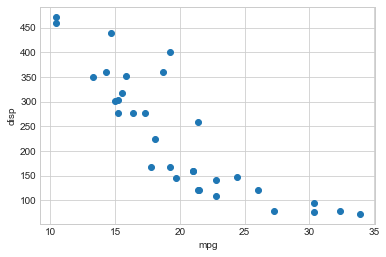

In [9]:
plt.scatter(X[:,0],X[:,1])
plt.xlabel("mpg")
plt.ylabel("disp")

In [10]:
Y = data.loc[:,['am']].values

In [11]:
Y # Automatic or manual transmission

array([[1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

In [12]:
z = linkage(X,'ward')

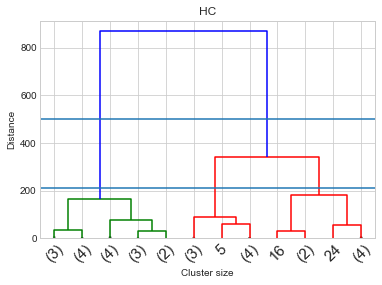

In [13]:
dendrogram(z , truncate_mode = 'lastp',p =12, leaf_rotation= 45.,leaf_font_size = 15.,show_contracted = True)

plt.title("HC")
plt.xlabel('Cluster size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=210)

In [14]:
k =2

hc1 = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')
hc1.fit(X)

sm.accuracy_score(Y , hc1.labels_)


0.78125

In [15]:


hc2 = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'complete')
hc2.fit(X)

sm.accuracy_score(Y , hc2.labels_)


0.78125

In [16]:

hc3 = AgglomerativeClustering(n_clusters = k, affinity = 'manhattan', linkage = 'average')
hc3.fit(X)

sm.accuracy_score(Y , hc3.labels_)


0.78125

In [17]:


hc4 = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'average')
hc4.fit(X)

sm.accuracy_score(Y , hc4.labels_)


0.78125

In [18]:
y_hc = hc1.fit_predict(X)

In [19]:
y_hc

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1])

In [20]:
X[y_hc == 0,0]

array([ 21.4,  18.7,  18.1,  14.3,  16.4,  17.3,  15.2,  10.4,  10.4,
        14.7,  15.5,  15.2,  13.3,  19.2,  15.8,  15. ])

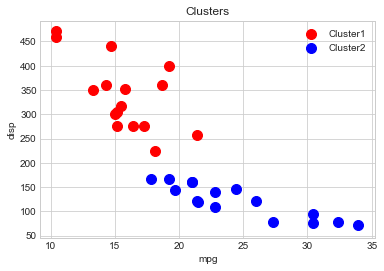

In [21]:
plt.scatter(X[y_hc == 0,0], X[y_hc == 0,1] , s=100, c = 'red',label = 'Cluster1')
plt.scatter(X[y_hc == 1,0], X[y_hc == 1,1] , s=100, c = 'blue',label = 'Cluster2')
plt.title('Clusters')
plt.xlabel('mpg')
plt.ylabel('disp')
plt.legend()
plt.show()